# Customer Segmentation for Mall Customers

### - This code is developed by TANAY MAYEE.

## 1. Problem Statement  

Customer Segmentation is a popular application of unsupervised learning. Using clustering, identify segments of customers to target the potential user base. They divide customers into groups according to common characteristics like gender, age, interests, and spending habits so they can market to each group effectively. Use K-means clustering and also visualize the gender and age distributions. Then analyze their annual incomes and spending scores. 

Language: Python (or) R 

Dataset/Package: (https://drive.google.com/file/d/19BOhwz52NUY3dg8XErVYglctpr5sjTy4/view)

## 2. Importing the necessary modules 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## 3. Loading the Dataset

In [2]:
df = pd.read_csv(r"C:\Users\hp\OneDrive\Desktop\Customer Segmentation\Mall_Customers.csv")

In [3]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


## 4. Analyzing the Dataset & removing the unwanted columns

In [4]:
df.drop('CustomerID', axis = 1, inplace=True)

In [5]:
df.head(10)

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
5,Female,22,17,76
6,Female,35,18,6
7,Female,23,18,94
8,Male,64,19,3
9,Female,30,19,72


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
Gender                    200 non-null object
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


In [7]:
df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


### INSIGHTS:
 - There are 200 rows and 4 columns after dropping the CustomerID column from the dataset.
 - Except the Gender attribute all other attributes are interger type.

## 5. Checking for NULL values in the Dataset

In [8]:
 df.isnull().values.any()

False

## 6. Data Visualization

### A. Visualizing the Gender distributions in the dataset

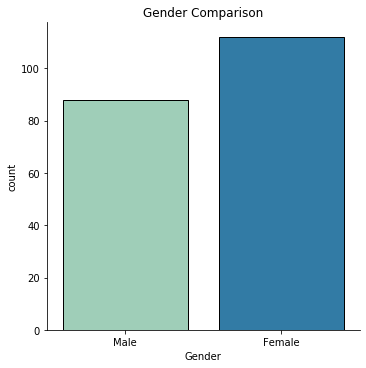

In [9]:
sns.catplot(x='Gender',kind='count', data=df, palette='YlGnBu', edgecolor='black').set(title='Gender Comparison')

### INSIGHTS:
- Clearly there are more female customers than the male customers in our dataset.
- To be precise let's plot a pie chart for the Gender Ratio comparison.

### B. Gender Ratio

In [10]:
genders = df.Gender.value_counts()
labels  = ['Female','Male']

In [11]:
genders

Female    112
Male       88
Name: Gender, dtype: int64

In [12]:
def make_autopct(genders):
    def my_autopct(pct):
        total = sum(genders)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct

([<matplotlib.patches.Wedge at 0x1cacc9f6908>,
 [Text(-0.20611945413751356, 1.080515974257694, 'Female'),
  Text(0.20611945413751367, -1.080515974257694, 'Male')],
 [Text(-0.11242879316591647, 0.5893723495951058, '56.00%  (112)'),
  Text(0.11242879316591654, -0.5893723495951058, '44.00%  (88)')])

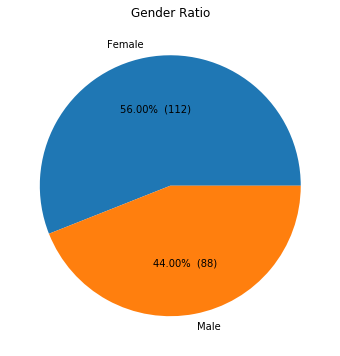

In [13]:
plt.figure(figsize=(10,6))
plt.title('Gender Ratio')
plt.pie(x=genders.values, labels=labels, autopct=make_autopct(genders))

### INSIGHTS:
- There are 112 female customers which is 56% of the total customers and 88 male customers which is 44% of the total customers.

### C. Number of Customers according to their Age

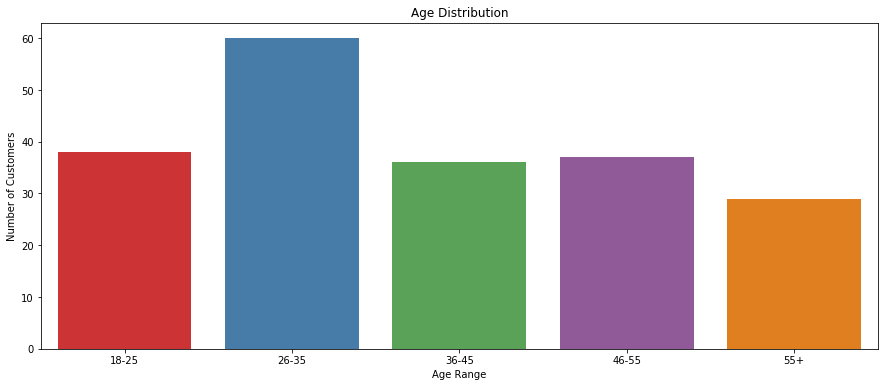

In [14]:
age18_25 = df.Age[(df.Age >= 18) & (df.Age <= 25)]
age26_35 = df.Age[(df.Age >= 26) & (df.Age <= 35)]
age36_45 = df.Age[(df.Age >= 36) & (df.Age <= 45)]
age46_55 = df.Age[(df.Age >= 46) & (df.Age <= 55)]
age55above = df.Age[df.Age >= 56]

age_x = ["18-25","26-35","36-45","46-55","55+"]
age_y = [len(age18_25.values),len(age26_35.values),len(age36_45.values),len(age46_55.values),len(age55above.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=age_x, y=age_y, palette="Set1")
plt.title("Age Distribution")
plt.xlabel("Age Range")
plt.ylabel("Number of Customers")
plt.show()

### INSIGHTS:
- The majority of customers are having their age in the range of 26 to 35,
- Then the customers having age between 18 to 25, 36 to 45, 46 to 55 are the second highest.
- Lastly, there are least number of customers having age more than 55.

### D. Number of Customers according to their Annual Income (k$)

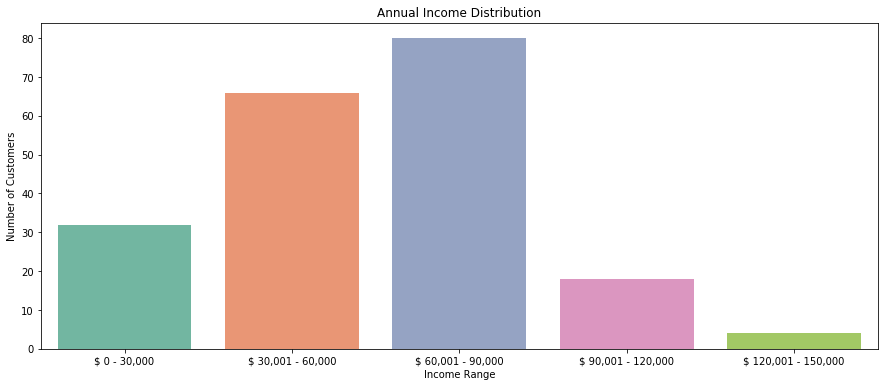

In [15]:
ai0_30 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 0) & (df["Annual Income (k$)"] <= 30)]
ai31_60 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 31) & (df["Annual Income (k$)"] <= 60)]
ai61_90 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 61) & (df["Annual Income (k$)"] <= 90)]
ai91_120 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 91) & (df["Annual Income (k$)"] <= 120)]
ai121_150 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 121) & (df["Annual Income (k$)"] <= 150)]

ai_x = ["$ 0 - 30,000", "$ 30,001 - 60,000", "$ 60,001 - 90,000", "$ 90,001 - 120,000", "$ 120,001 - 150,000"]
ai_y = [len(ai0_30.values), len(ai31_60.values), len(ai61_90.values), len(ai91_120.values), len(ai121_150.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=ai_x, y=ai_y, palette="Set2")
plt.title("Annual Income Distribution")
plt.xlabel("Income Range")
plt.ylabel("Number of Customers")
plt.show()

### INSIGHTS:
- Most of the customers earn an amount in the range of 60k to 90k dollars.
- Then there are customers earning an amount between 30k to 60k dollars and the ones who earn less than 30k dollars.
- At last there are very few people who have huge income which is from 90k to 120k dollars and 120k to 150k dollars.

### E. Number of Customers according to their Spending Scores (1-100)

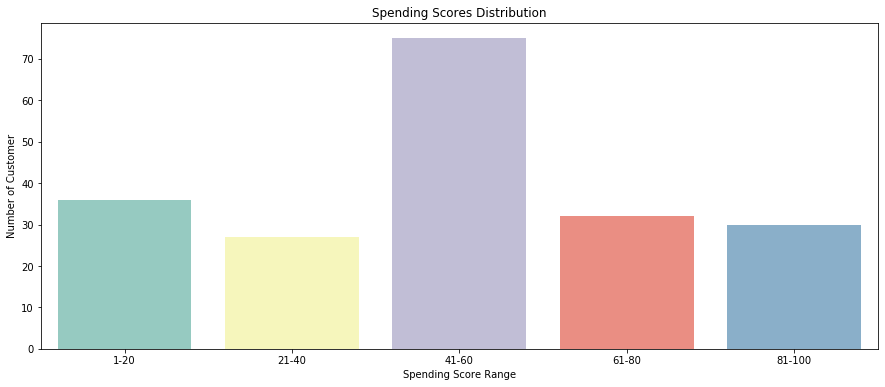

In [16]:
ss1_20 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 1) & (df["Spending Score (1-100)"] <= 20)]
ss21_40 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 21) & (df["Spending Score (1-100)"] <= 40)]
ss41_60 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 41) & (df["Spending Score (1-100)"] <= 60)]
ss61_80 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 61) & (df["Spending Score (1-100)"] <= 80)]
ss81_100 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 81) & (df["Spending Score (1-100)"] <= 100)]

ss_x = ["1-20", "21-40", "41-60", "61-80", "81-100"]
ss_y = [len(ss1_20.values), len(ss21_40.values), len(ss41_60.values), len(ss61_80.values), len(ss81_100.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=ss_x, y=ss_y, palette="Set3")
plt.title("Spending Scores Distribution")
plt.xlabel("Spending Score Range")
plt.ylabel("Number of Customer")
plt.show()

### INSIGHTS:
- Most of the customers are having their Spending Scores in the range of 41 to 60.
- Then there are customers with Spending Scores in the range of 1 to 20, 61 to 80, 81 to 100 and lastly 21 to 40.

### F. Annual Income (k$) v/s Spending Scores(1-100)  

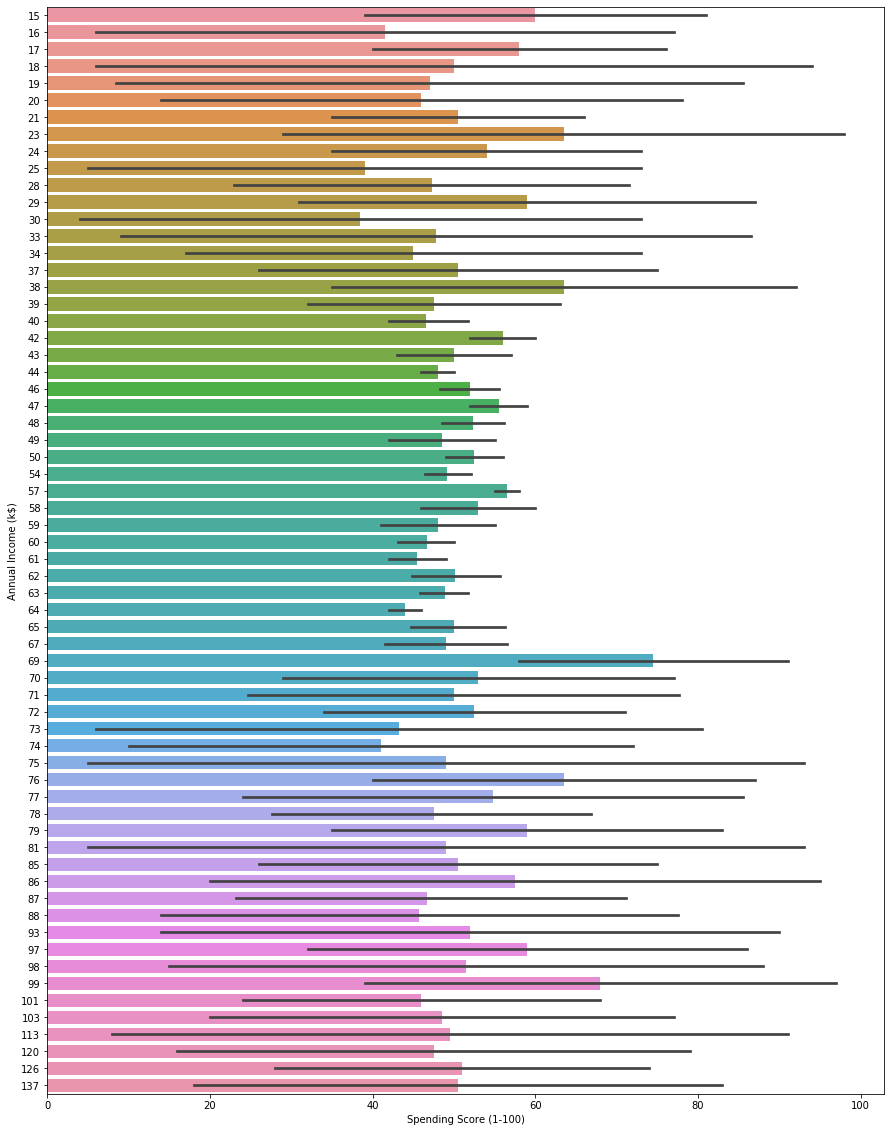

In [18]:
df_top = df[['Annual Income (k$)', 'Spending Score (1-100)']].sort_values('Spending Score (1-100)')[:200]
fig, ax = plt.subplots(figsize = (15, 20))
sns.barplot(y = 'Annual Income (k$)', x = 'Spending Score (1-100)', data = df_top, orient ='h',ax = ax)

### NOTE: 
- Above graph visualizes the customers with respect to their Annual Incomes and their Spending Scores. 
- The next boxplot will annotate the  distribution of Annual Incomes of customers with respect to their Spending Scores.

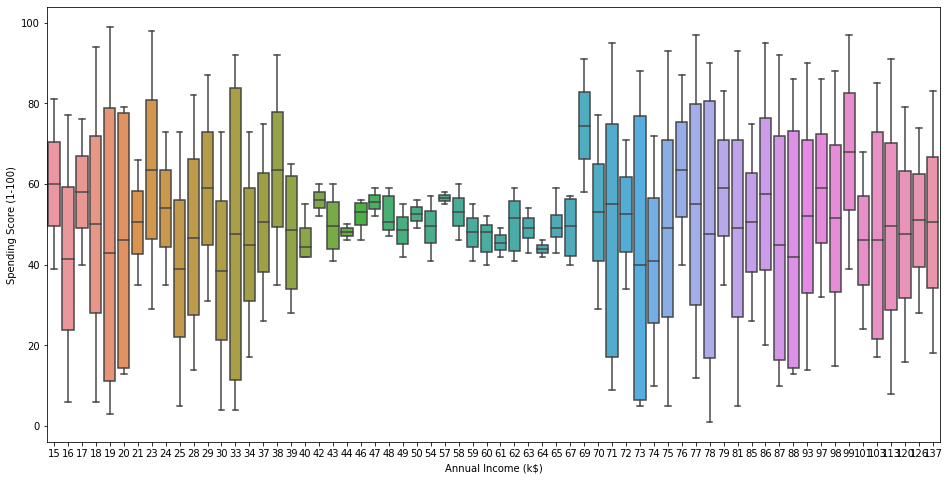

In [19]:
data_comparision = df[['Annual Income (k$)', 'Spending Score (1-100)']]
fig, ax = plt.subplots(figsize = (16 , 8))
sns.boxplot(x = 'Annual Income (k$)', y = 'Spending Score (1-100)', data = data_comparision,ax = ax)

### G. Heatmap to find the Correlation between various Attributes of the Dataset

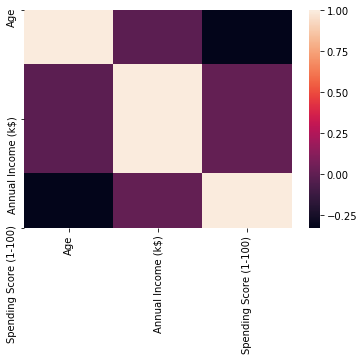

In [20]:
sns.heatmap(df.corr(), vmax=1, fmt='.1g')

### INSIGHTS:
- We can clearly see that there is no correlation(~ 0.00) between any of the Attributes in our DataSet. 

## 7. The Fun Part (Clustering the Data using K-Means Clustering)

### A. Importing the necessary libraries 

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder    #to label encode the gender values
from sklearn.preprocessing import StandardScaler  #to make the K-means and Principle Component Analysis run smoother

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA  #(Principle Component Analysis)

In [27]:
df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


### B. Label Encoding the Gender values

In [28]:
encoder = LabelEncoder()
df['Gender'] = encoder.fit_transform(df['Gender'])  

In [29]:
df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18


### INSIGHTS:
- So the Gender values are now encoded, i.e. Female corresponds to '0' and Male corresponds to '1'. 

### C. Feature Scaling on our Dataset

Let us now scale our data so that it'll be a lot easier for clustering.

In [30]:
scaler = StandardScaler()
scaled_data = pd.DataFrame(scaler.fit_transform(df), columns = df.columns)
scaled_data

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1.128152,-1.424569,-1.738999,-0.434801
1,1.128152,-1.281035,-1.738999,1.195704
2,-0.886405,-1.352802,-1.700830,-1.715913
3,-0.886405,-1.137502,-1.700830,1.040418
4,-0.886405,-0.563369,-1.662660,-0.395980
...,...,...,...,...
195,-0.886405,-0.276302,2.268791,1.118061
196,-0.886405,0.441365,2.497807,-0.861839
197,1.128152,-0.491602,2.497807,0.923953
198,1.128152,-0.491602,2.917671,-1.250054


### D. Clustering using K-Means Clustering

Let's first test out some values for number of clusters and then we'll decide the actual number of clusters using the Elbow Method.

In [31]:
n_clusters = range(1,50)

In [32]:
kmeans_tests = [KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10) for i in n_clusters]

In [33]:
inertias = [kmeans_tests[i].fit(scaled_data).inertia_ for i in range(len(kmeans_tests))]

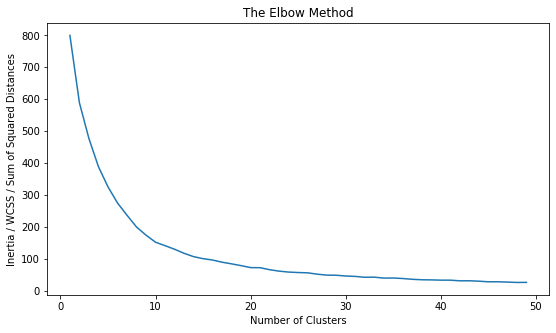

Wall time: 143 ms


In [28]:
%%time
plt.figure(figsize=(9,5))
plt.plot(n_clusters, inertias)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia / WCSS / Sum of Squared Distances')
plt.title('The Elbow Method')
plt.show()

### INSIGHTS:
- Here we can see that there is a slight bend (the elbow) when the K value i.e. the Number of Clusters are equal to 10 and hence we'll choose 10 as our Number of Clusters. 
- Now let's build our actual model considering the number of clusters as 10.

In [34]:
kmeans = KMeans(n_clusters = 10, init = 'k-means++', max_iter = 300, n_init = 10)
kmeans.fit(scaled_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

Now let's see what clusters are assigned to each of the customers in our dataset.

In [35]:
clusters = kmeans.predict(scaled_data)
clusters

array([4, 4, 9, 7, 9, 7, 9, 7, 6, 7, 6, 7, 9, 7, 9, 4, 9, 4, 6, 7, 4, 4,
       9, 4, 9, 4, 9, 4, 9, 7, 6, 7, 6, 4, 9, 7, 9, 7, 9, 7, 2, 4, 6, 1,
       9, 7, 2, 1, 1, 1, 2, 4, 1, 6, 2, 6, 2, 6, 1, 6, 6, 4, 2, 2, 6, 4,
       2, 2, 4, 1, 6, 2, 2, 2, 6, 4, 2, 4, 1, 2, 6, 4, 6, 2, 1, 6, 2, 1,
       1, 2, 2, 4, 6, 1, 1, 4, 2, 1, 6, 4, 1, 2, 6, 4, 6, 1, 2, 6, 6, 6,
       6, 1, 1, 4, 1, 1, 2, 2, 2, 2, 4, 1, 1, 3, 1, 8, 0, 3, 6, 3, 0, 3,
       1, 8, 0, 8, 5, 3, 0, 8, 5, 3, 1, 8, 0, 3, 0, 8, 5, 3, 0, 3, 5, 8,
       5, 8, 0, 8, 0, 8, 2, 8, 0, 8, 0, 8, 0, 8, 5, 3, 0, 3, 0, 3, 5, 8,
       0, 3, 0, 3, 5, 8, 0, 8, 5, 3, 5, 3, 5, 8, 5, 8, 0, 8, 5, 8, 5, 3,
       0, 3])

### E. Principle Component Analysis (PCA)

We are using PCA just for the sake of simplicity because we will not be able to visualize our analysis in 4 dimensions as we have 4 different attributes, hence we'll perform dimensionality reduction and bring it down to 2 dimensions.

In [36]:
pca = PCA(n_components = 2)
reduced_data = pd.DataFrame(pca.fit_transform(scaled_data), columns = ['PC1','PC2'])
reduced_data

,PC1,PC2
0,-0.406383,-0.520714
1,-1.427673,-0.367310
2,0.050761,-1.894068
3,-1.694513,-1.631908
4,-0.313108,-1.810483
...,...,...
195,-1.179572,1.324568
196,0.672751,1.221061
197,-0.723719,2.765010
198,0.767096,2.861930


### INSIGHTS:
- We now have the same 200 samples from our dataset, just that previously we had 4 different features i.e. the Gender, Age, Annual Income and the Spending Score which have now been reduced to 2 new features i.e. the Principle Component 1(PC1) and the Principle Component 2(PC2).

In [37]:
kmeans.cluster_centers_

array([[ 1.12815215, -0.02700694,  0.96701244, -1.39716754],
       [-0.88640526, -0.78153925, -0.12214217, -0.11957041],
       [-0.88640526,  1.09830638, -0.24158313, -0.04807901],
       [ 1.12815215, -0.39989994,  1.01344075,  1.26040667],
       [ 1.12815215, -0.97602698, -0.73705168,  0.41603773],
       [-0.88640526,  0.35421988,  1.24912183, -1.14745442],
       [ 1.12815215,  1.43505777, -0.45298304, -0.40195247],
       [-0.88640526, -0.96084556, -1.33087991,  1.17778643],
       [-0.88640526, -0.47793198,  0.97284787,  1.22158511],
       [-0.7425083 ,  0.16967696, -1.31640908, -1.1668652 ]])

### INSIGHTS:
- The above array represents the position of our cluster centers which are in 4 dimensions and as you can see we have 10 different clusters.

In [38]:
reduced_centers = pca.transform(kmeans.cluster_centers_)
reduced_centers

array([[ 1.19961046,  1.30582744],
       [-0.662429  , -0.58044771],
       [ 0.58233488, -0.85939176],
       [-0.88272588,  1.65431318],
       [-0.68838314,  0.28733559],
       [ 0.81659377,  0.24505923],
       [ 1.5303687 ,  0.17028966],
       [-1.6696024 , -1.35294268],
       [-1.38150389,  0.3644368 ],
       [ 0.75229959, -1.61087948]])

### INSIGHTS:
- Similarly the above array represents the position of our 10 different cluster centers.

### F. Visualizing the Clusters

Now before we do that let's just have an overview of what clusters are assigned to the samples in our dataset.

In [39]:
reduced_data['Cluster'] = clusters
reduced_data

,PC1,PC2,Cluster
0,-0.406383,-0.520714,4
1,-1.427673,-0.367310,4
2,0.050761,-1.894068,9
3,-1.694513,-1.631908,7
4,-0.313108,-1.810483,9
...,...,...,...
195,-1.179572,1.324568,8
196,0.672751,1.221061,5
197,-0.723719,2.765010,3
198,0.767096,2.861930,0


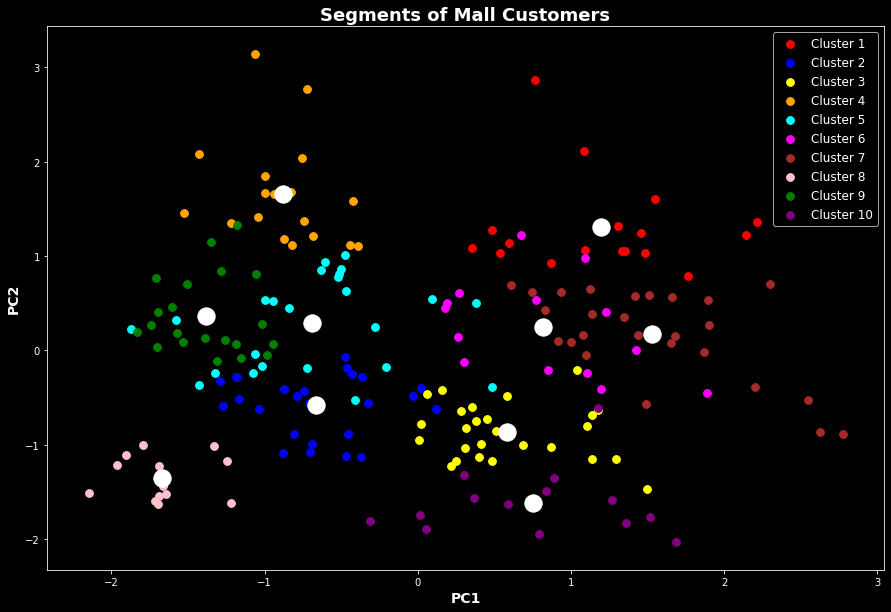

In [41]:
plt.figure(figsize = (15,10))
plt.scatter(reduced_data[reduced_data['Cluster'] == 0].loc[:,'PC1'], reduced_data[reduced_data['Cluster'] == 0].loc[:,'PC2'], color = 'red', s=60, label = 'Cluster 1') #(We are assigning X = PC1 value for cluster 0 and Y = PC2 value for cluster 0) 
plt.scatter(reduced_data[reduced_data['Cluster'] == 1].loc[:,'PC1'], reduced_data[reduced_data['Cluster'] == 1].loc[:,'PC2'], color = 'blue', s=60, label = 'Cluster 2')
plt.scatter(reduced_data[reduced_data['Cluster'] == 2].loc[:,'PC1'], reduced_data[reduced_data['Cluster'] == 2].loc[:,'PC2'], color = 'yellow', s=60, label = 'Cluster 3')
plt.scatter(reduced_data[reduced_data['Cluster'] == 3].loc[:,'PC1'], reduced_data[reduced_data['Cluster'] == 3].loc[:,'PC2'], color = 'orange', s=60, label = 'Cluster 4')
plt.scatter(reduced_data[reduced_data['Cluster'] == 4].loc[:,'PC1'], reduced_data[reduced_data['Cluster'] == 4].loc[:,'PC2'], color = 'cyan', s=60, label = 'Cluster 5')
plt.scatter(reduced_data[reduced_data['Cluster'] == 5].loc[:,'PC1'], reduced_data[reduced_data['Cluster'] == 5].loc[:,'PC2'], color = 'magenta', s=60, label = 'Cluster 6')
plt.scatter(reduced_data[reduced_data['Cluster'] == 6].loc[:,'PC1'], reduced_data[reduced_data['Cluster'] == 6].loc[:,'PC2'], color = 'brown', s=60, label = 'Cluster 7')
plt.scatter(reduced_data[reduced_data['Cluster'] == 7].loc[:,'PC1'], reduced_data[reduced_data['Cluster'] == 7].loc[:,'PC2'], color = 'pink', s=60, label = 'Cluster 8')
plt.scatter(reduced_data[reduced_data['Cluster'] == 8].loc[:,'PC1'], reduced_data[reduced_data['Cluster'] == 8].loc[:,'PC2'], color = 'green', s=60, label = 'Cluster 9')
plt.scatter(reduced_data[reduced_data['Cluster'] == 9].loc[:,'PC1'], reduced_data[reduced_data['Cluster'] == 9].loc[:,'PC2'], color = 'purple', s=60, label = 'Cluster 10')

plt.scatter(reduced_centers[:,0], reduced_centers[:,1], color = 'white', marker='o', s=300)

plt.xlabel('PC1', fontsize=14.0, fontweight='bold')
plt.ylabel('PC2', fontsize=14.0, fontweight='bold')
plt.title('Segments of Mall Customers', fontsize=18, fontweight='bold')
plt.style.use('dark_background')
plt.legend(prop={'size': 12})
plt.show()